# <div dir=rtl> תרגול שישי - Logistic Regression </div>
<div dir=rtl>
בתרגול הקודם ביצענו רגרסיה כדי ללמוד לחזות משתנה מטרה רציף. כעת נעבור ללימוד חיזוי משתנה מטרה בדיד (קטגורי או פשוט בוליאני), להלן סיווג\קלסיפיקציה. חלק מהגישות מחזירות את הבעיה לתחום הרציף ע"י מידול ההסתברות (של שיוך ), וביניהן השיטה הקלאסית ביותר בעלת השם המבלבל "רגרסיה לוגיסטית" . ג
</div>

## <div dir=rtl>שאלה 1</div>

<div dir=rtl>
    בשנת 2008 פרסם הNIH האמריקאי מידע על אודות 4238 תושבי העיר פארמינגהם במדינת מסצ'וסטס. <br />
    המידע כלל נתונים על בריאותם של המשתתפים במחקר והאם בתוך עשור המשתתפים זוהו כסובלים ממחלות בכלי הדם הכליליים בלב. המידע זמין בקובץ 6_heart_disease_2.csv. <br />
</div>
<div dir=rtl style='background-color: #fcf2f2;'> 
    הערה: הדאטאסט אמיתי וניתן להורדה בצורה חופשית. הנתונים בו שונו לצורך הדוגמה. <br />
</div><br />
<div dir=rtl>
    א. טענו את הקובץ לאובייקט מסוג DataFrame.
</div>

In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv('6_heart_disease_2.csv')
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1542,0,63,2.0,0,0.0,0.0,0,1,0,293.0,186.5,97.0,30.47,60.0,96.0,0
534,1,36,1.0,0,0.0,0.0,0,1,0,182.0,145.0,102.0,30.92,72.0,70.0,0
202,1,52,2.0,1,15.0,0.0,0,0,0,240.0,94.0,66.5,22.93,70.0,88.0,0
742,1,52,2.0,0,0.0,0.0,0,1,0,196.0,126.0,80.0,22.32,104.0,74.0,0
2225,1,38,4.0,0,0.0,0.0,0,0,0,240.0,122.5,80.0,23.97,60.0,43.0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


<div dir=rtl>
    ב. בטבלאת הנתונים עמודה אחת לקיומה של מחלת לב - TenYearCHD ושש עמודות של משתנים רציפים. <br />
    עבור כל זוג משתנים רציפים צרו תרשים המתאר את התפלגות הדגימות כתלות בשני המשתנים. על צבע הדגימה לשקף את סוג הדגימה - כלומר האם היא דגימה של אדם אשר לקה במחלת לב כלילית או לא.
</div>

In [5]:
continuous = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']

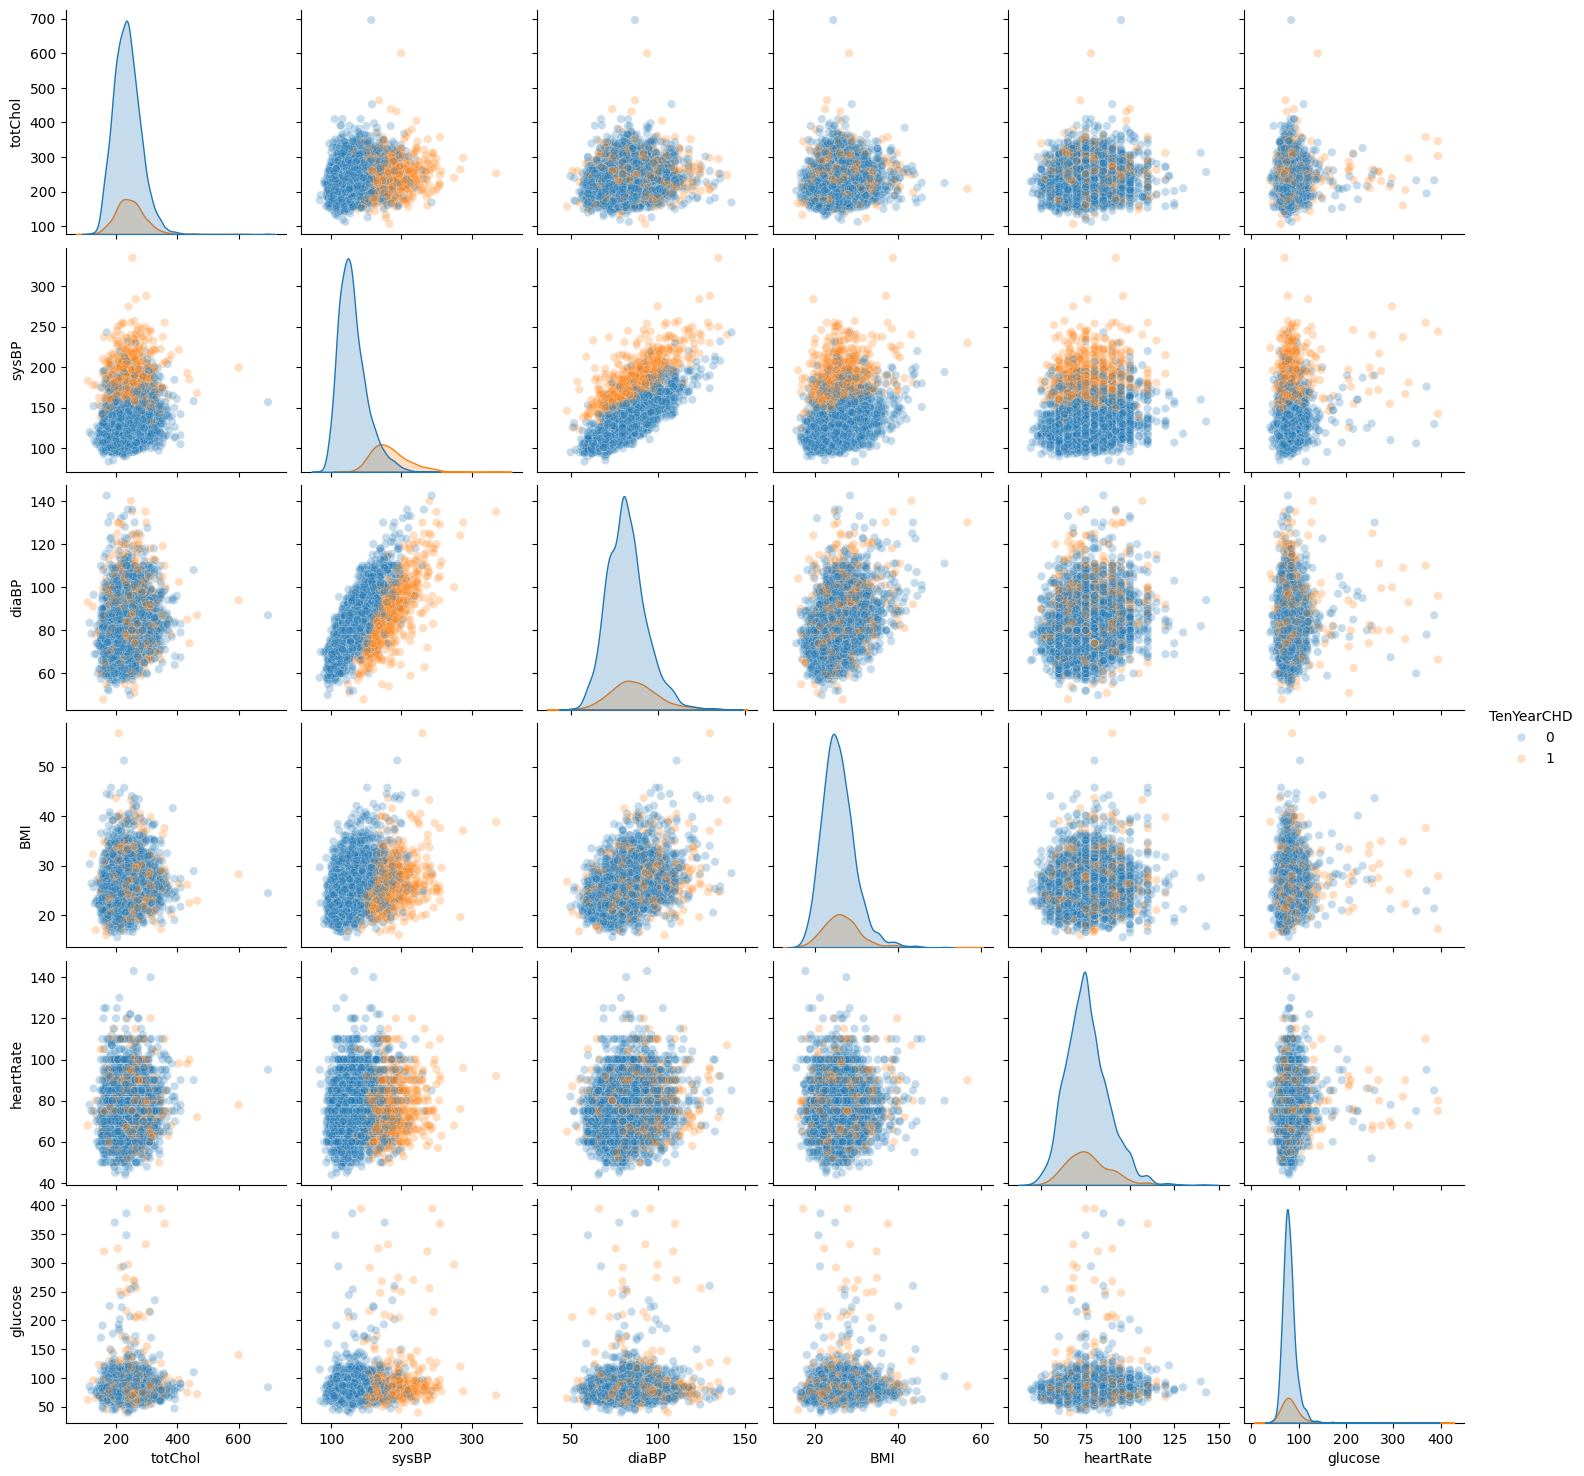

In [6]:
import seaborn as sns

pairp = sns.pairplot(
    df[continuous + ['TenYearCHD']],
    hue='TenYearCHD',
    plot_kws={'alpha':0.25}
)

<div dir=rtl>
    בתרשים למעלה אנחנו רואים את עמודות הפיצ'רים (למשל דופק בעת הגעה לרופא, אינדקס מסת גוף ועוד) אחת כתלות בשנייה.  כאשר כל נקודה היא מקרה מהמדגם (שורה יצת הדאטא). הצבע הוא עמודת המטרה. בכל המשבצות שבשורה מסוימת ציר ה-Y הוא פיצ"ר מסוים, למשל בכל הגרפים בשורה שנייה ציר ה-Y הוא ה- SysBP, ולהפך בכל התמונות בעמודה השנייה, ה- SysBP ציר ה-X
    <br />באלכסון מוצגות היסטוגרמות של  החיוביים והשליליים (מבחינת ערך עמודת המטרה) כאשר ציר X הוא פיצ"ר הרלוונטי למשל ה-SysBP משבצת השנייה באלכסון.<br />
    <br />
    ניתן לראות שה-SysBP ובמידה פחותה ה-diaBP נותנות הפרדה טובה בין הצבעים כלומר בעלות פוטנציאל לסיווג (חיזוי המטרה) ע"י השוואה לסף בחד מימד או העברת ישר חוצה בדו-מימד
</div>
<br />
----------------------------------------------------------------------------------------------
<div dir=rtl>
    ג. צרו מודל לינארי לניבוי האם נבדק יחלה או לא יחלה על בסיס פצ'ר אחד.
    <br /><br />
    נבחר במודל מסוג רגרסיה לוגיסטית.
    </br>
     נשים לב לא להתבלבל עם מודל מסוג רגרסיה לינארית המשמש לפרדיקציה של ערכים בתחום הרציף. <br />
    ברגרסיה לוגיסטית חד-מימדית נשתמש בפונקציה מסוג סיגמואיד ונתאים אותה לדאטא או ליתר דיוק לצפיפות היחסית של הנקודות משתי המחלקות. הסיגמואיד  מחזיר מספר בתחום [0,1]. נהוג להשתמש בערך הזה כהסתברות להיות במחלקה החיובית ואנחנו נסווג דוגמה כשייכת למחלקה החיובית אם ההסתברות הזו גדולה מ0.5.
    </br>
    </br>
     ברגרסיה לוגיסטית רב-מימדית נלמד גם הטלה (וכאן הדמיון לרגרסיה ליניארית) על כיוון שלאורכו ישתנה הלוגיט Z באופן ליניארי וההסתברות המשוערכת sigm(z) באופן סיגמואידלי. בניצב לציר השתנות זה ישכנו משטחים שווי-הסתברות  כיוון שכל נק במשטח מוטלת לאותה נק על הציר , והמשטח בעל הס 0.5 יהווה את משטח ההפרדה\סיווג שלנו

</div>

%%html <iframe width="560" height="315" src="https://www.youtube.com/embed/smLdMzVlmyU?si=jbBtJqFe3_BH61XB&amp;clip=UgkxLiavyVaCxyxGEYrcl_33I340xpipvfC_&amp;clipt=EL7QHBjJlR4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

My clip: https://youtube.com/clip/UgkxLiavyVaCxyxGEYrcl_33I340xpipvfC_?si=p8oh21fokYMLdlkq

Full video: https://www.youtube.com/clip/UgkxLiavyVaCxyxGEYrcl_33I340xpipvfC_

TODO image

<br />
<div dir=rtl>
    המשוואות המתארות את המודל מפורטות למטה. 
    </br>
    עבור המקרה הפרטי בו הפרדיקציה תלויה במשתנה אחד ממורכז סביב אפס עם שיפוע רבע:
</div>

\begin{align}
\hat p(y=1) = \frac{1}{1+e^{-z}}\\
\end{align}
<div dir=rtl>
    במקרה החד מימדי הכללי בו המשתנה הבלתי תלוי הוא x:

\begin{align}
z = a_0 + a_1x\\
\end{align}

שני הפרמטרים קובעים את מיקום ואת חדות המעבר מ-0 ל-1
</br>
    במקרה הכללי בו הנקודה מיוצגת על ידי ווקטור של משתנים בלתי תלויים X ומקדמים A:

\begin{align}
z = A^TX\\
\end{align}
</div>
השיפועים הצמודים למשתנים השונים קובעים את הוקטור של ציר ההשתנות ושל משטחי ההפרדה הניצבים לו
</br>
 (ובנוסף, את חדות ההפרדה שתגדל אם נכפיל את כל השיפועים באותו מספר)

<div dir=rtl>
נשתמש במקרה החד מימדי כדי להדגים איך הפרמטרים למעלה משפיעים על צורת הפונקציהי,
</div>

<div dir=rtl>
    נתחיל עם המאפיין sysBP - אשר מדווח על לחץ הדם הסיסטולי של המטופל בהגעה למרפאה. <br />
    נבחר בו משום שבתרשים למעלה ניתן לראות הפרדה טובה של שתי המחלקות לפי המאפיין הזה.
</div>

sysBP    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

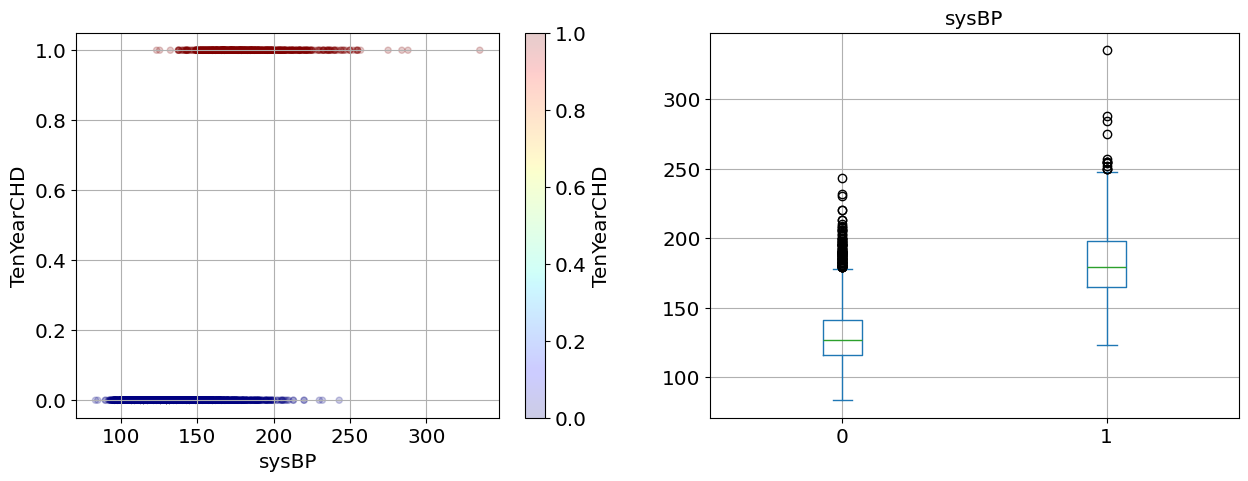

In [7]:
import matplotlib.pyplot as plt
import numpy as np

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.grid':True,
         'axes.grid.which':'both'
         }
plt.rcParams.update(params)

plt.subplot(1,2,1)
scatp = df[['sysBP','TenYearCHD']].plot.scatter(
    x='sysBP',
    y='TenYearCHD',
    c='TenYearCHD',
    cmap='jet',
    alpha=0.2,
    sharex=False,
    ax=plt.gca()
)
plt.subplot(1,2,2)
df[['sysBP','TenYearCHD']].plot.box(by='TenYearCHD', ax=plt.gca())

The boxplot is a nice summary already suggesting a threshold around sysBP=150.

Can we visualize the denisty better?

Text(0.5, 0, 'SysBP')

<Figure size 1000x300 with 0 Axes>

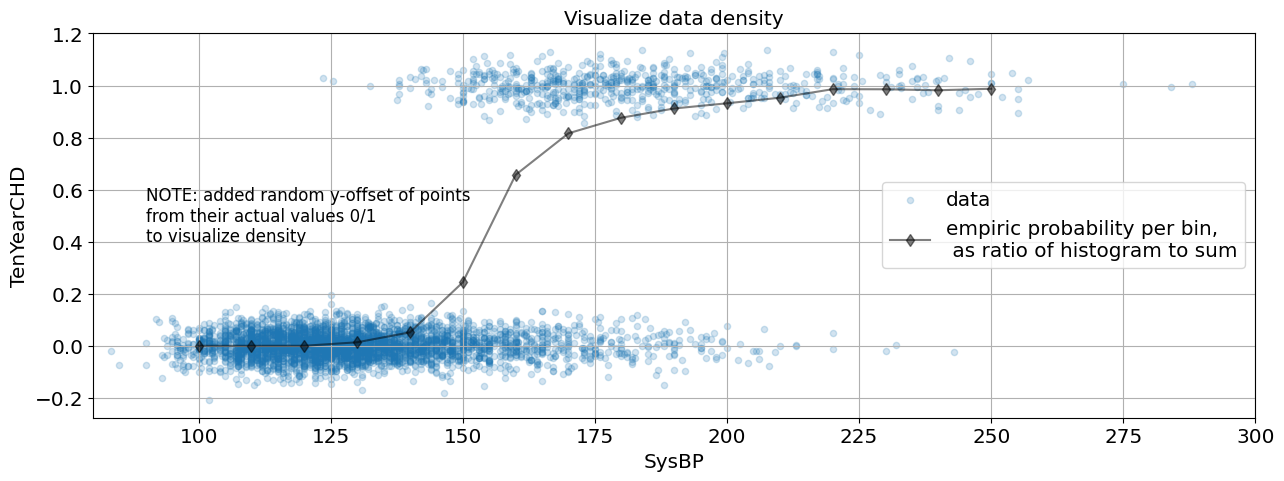

In [47]:

plt.figure(figsize=(10, 3))

df_ = pd.DataFrame(df[['sysBP','TenYearCHD']])
df_.TenYearCHD = df_.TenYearCHD.astype('float64')  
df_[['TenYearCHD']] += 0.05*np.random.randn(len(df_), 1)

scatp = df_.plot.scatter(
    x='sysBP',
    y='TenYearCHD',
    #c='TenYearCHD',
    #cmap='jet',
    sharex=False, 
    colorbar=False,
    alpha=0.2,
    title='Visualize data density'
)
plt.text(90, 0.4, fontsize=12,
         s='NOTE: added random y-offset of points \nfrom their actual values 0/1 \nto visualize density',
         )

# ! Crude estimate of probability as bin-wise histograms ratio
do_density = True  # TODO True ignores unbalanced data - what's the problem with that? (prior probability..)
h1, bins = np.histogram(df_[df.TenYearCHD==1], range(90, 260, 10), density=do_density)
h0, bins = np.histogram(df_[df.TenYearCHD==0], range(90, 260, 10), density=do_density)

plt.plot(bins[1:], h1 / (h0+h1), 'kd-', alpha=0.5)
plt.legend(['data','empiric probability per bin,\n as ratio of histogram to sum'])
plt.xlim(80, 300)
plt.xlabel('SysBP')

<div dir=rtl>
    כעת ננסה להתאים מודל סיגמואיד של הסתברות (רגרסיה לוגיסטית) . 
    </br>
    לצורך תפיסת תמונה גסה סדר 0 אפשר לחשוב על זה כהתאמת עקומה להסתברות האמפירית הנ"ל,
</br>
    (כמובן שהאלגוריתם לא עושה את זה כך. שיטה כזאת זורקת חלק גדול מהמידע באופן לא אחיד, חשופה להטיות וחוסר יציבות)
</div>

To the next (1st) order, the algorithm maximizes the likelihood (MLE - Maximum Likelihood Estimation)
$$ \textit{Likelihood} = log\ p(data|model) = \log\prod_i p(y_i|model) = \sum\limits_{i:\ y_i=1}{\log \hat p_y(x_i)} + \sum\limits_{i:\ y_i=0}{\log (1-\hat p_y(x_i))}  $$
Equivalently, minimize the "loss" = -likelihood. 

 Plugging in the "logistic" (sigmoid) model: $\hat p_y(x_i)=\frac{1}{1+e^{-A^TX_i}}$,
 
  we get:
$$ A = \argmin\limits_{A} \left[ -\sum\limits_{i:\ y_i=1}{\log \frac{1}{1+e^{-A^TX_i}}} - \sum\limits_{i:\ y_i=0}{\log \frac{e^{-A^TX_i}}{1+e^{-A^TX_i}}} \right] $$
$$   = argmin\ \sum\limits_{i:\ y_i=1}{\log (1+e^{-A^TX_i})} + \sum\limits_{i:\ y_i=0}{\log (1+e^{A^TX_i})}  $$
Give the formula a minute, it just looks intimidating..:)

It eventually just says we'd like the projection $A^TX_i$ to be large positive for $y_i=1$ and large negative otherwise

The remaining detail is just the addition of "regularization terms" to the overall loss that gets minimized. We'll meet that at later weeks.

In [49]:
import statsmodels.api as sm

df.sort_values(by='sysBP', inplace=True)
x = df['sysBP']
X = sm.add_constant(x)
Y = df['TenYearCHD']
logistic_1d = sm.Logit(Y, X)
results = logistic_1d.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.209686
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                  0.5079
Time:                        08:25:05   Log-Likelihood:                -888.65
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.5705      0.490    -29.761      0.000     -15.530     -13.611
sysBP          0.0835      0.003     27.845      0.000       0.078       0.089
==============================================================================
"""

<div dir=rtl>
    גם כאן, כמו ברגרסיה לינארית, אנחנו מקבלים מקדמים המתאימים למקדם החופשי ולמשתנה לפיו ביצענו את הרגרסיה.
    <br />
    ננסה להבין את המשמעות של מה שקיבלנו. לצורך כך נשרטט את הפונקציה יחד עם הנקודות המקוריות ולצידם נשרטט את .הנקודות לפי התחזית שלהן
</div>

(80.0, 300.0)

<Figure size 2000x600 with 0 Axes>

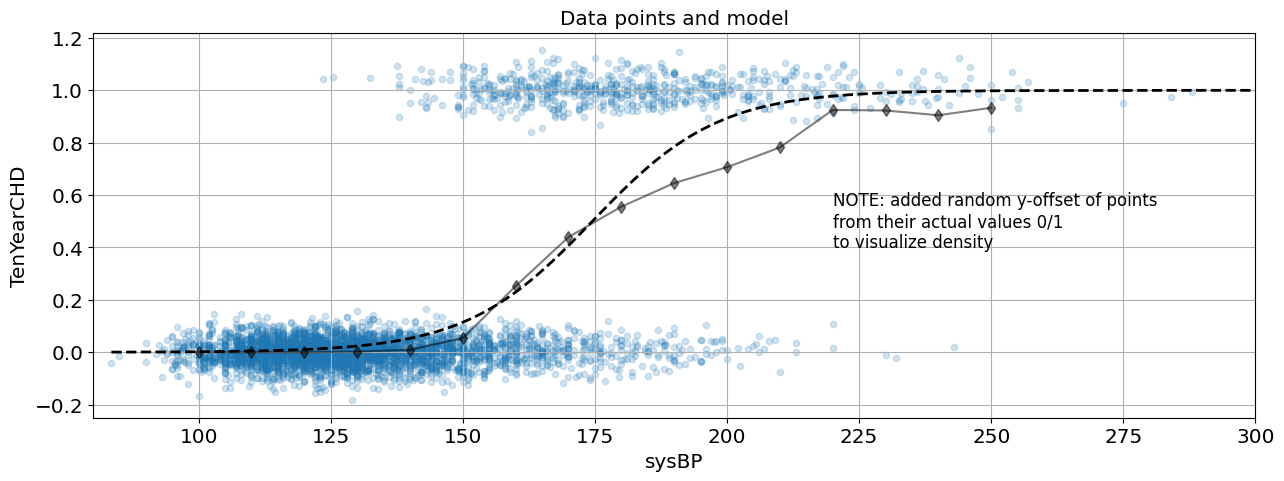

In [55]:
plt.figure(figsize=(20, 6))
# Create a copy and add noise:
df_ = pd.DataFrame(df[['sysBP','TenYearCHD']])
df_.TenYearCHD = df_.TenYearCHD.astype('float64')  
df_[['TenYearCHD']] += 0.05*np.random.randn(len(df_), 1)

scatp = df_.plot.scatter(
    x='sysBP',
    y='TenYearCHD',
    sharex=False, 
    colorbar=False,
    alpha=0.2,
    title='Data points and model'
)
y_pred = results.predict(X)
logitp = plt.plot(x, y_pred, 'k--', linewidth=2)

plt.text(220, 0.4, fontsize=12,
         s='NOTE: added random y-offset of points \nfrom their actual values 0/1 \nto visualize density',
         )

h1, bins = np.histogram(df_[df.TenYearCHD==1], range(90, 260, 10)) 
h0, bins = np.histogram(df_[df.TenYearCHD==0], range(90, 260, 10)) 
plt.plot(bins[1:], h1 / (h0+h1), 'kd-', alpha=0.5)
plt.xlim(80, 300)

In [11]:
bool_pred = results.predict(X) > 0.5
y_pred = bool_pred.astype(int)
df['logistic 1d prediction'] = y_pred
df['logistic 1d prediction']

2665    0
3578    0
420     0
2894    0
1685    0
       ..
1588    1
2091    1
864     1
3489    1
481     1
Name: logistic 1d prediction, Length: 4238, dtype: int32

Text(140, 0.8, 'False negatives')

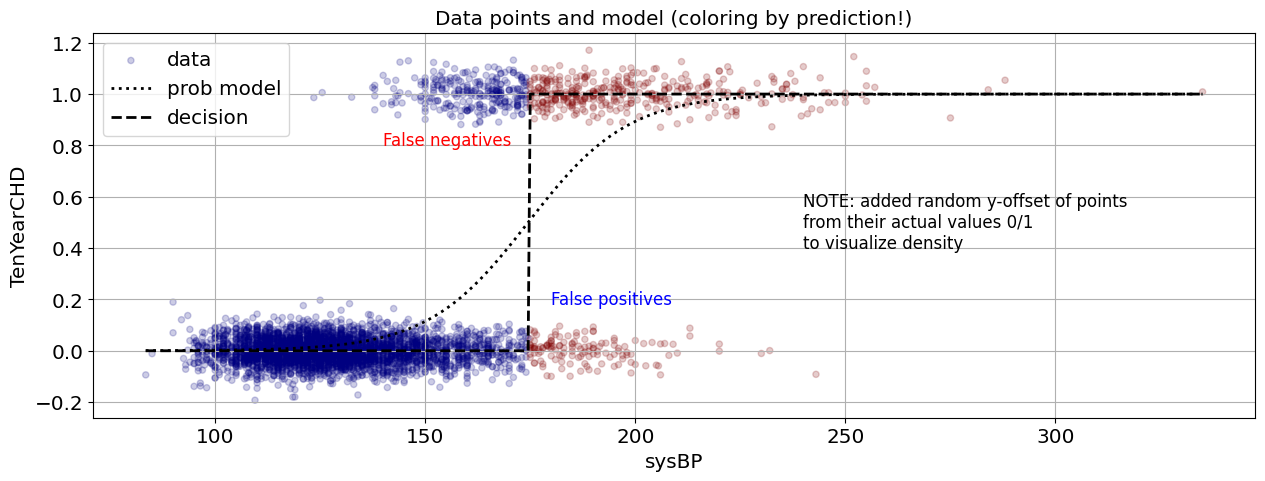

In [12]:
# Create a copy and add noise:
df_ = pd.DataFrame(df[['sysBP','TenYearCHD', 'logistic 1d prediction']])
df_.TenYearCHD = df_.TenYearCHD.astype('float64')  
df_[['TenYearCHD']] += 0.05*np.random.randn(len(df_), 1)

scatp = df_.plot.scatter(
    x='sysBP',
    y='TenYearCHD',
    c='logistic 1d prediction',
    cmap='jet',
    sharex=False, 
    colorbar=False,
    alpha=0.2,
    title='Data points and model (coloring by prediction!)'
)

logitp = plt.plot(x, results.predict(X), 'k:', x, y_pred, 'k--', linewidth=2)
plt.legend(['data', 'prob model', 'decision'])

plt.text(240, 0.4, fontsize=12,
         s='NOTE: added random y-offset of points \nfrom their actual values 0/1 \nto visualize density',
         )
plt.text(180, 0.18, fontsize=12, color='b',
         s='False positives',
         )
plt.text(140, 0.8, fontsize=12, color='r',
         s='False negatives',
         )

<div dir=rtl>
    ג. מה טיב הסיווג?
</div>
<br /><br />

<div dir=rtl>
    נכיר כעת את הקונספט של confusion matrix. הטבלה מתארת כמה מתוך חברי המחלקה סווגו תחת לייבל כזה או אחר של המסווג. <br />
    אמנם ראינו טבלאות כאלה בעבר אבל ראינו אותן בהקשר של למידה לא מפוקחת, ושם אמרנו שאין משמעות לשמות המקבצים לכן אין משמעות להשמה על העמודה המתאימה. כאן יש משמעות להשמה הזו מכיוון שזו הפרדיקציה למחלקה. מכאן נובע שהמקרה האידאלי הוא קבלת מטריצה אלכסונית.
</div>

In [13]:
CM = pd.DataFrame(
    df.groupby(['TenYearCHD','logistic 1d prediction']).size(),
    columns=['# of subjects']
)

display(CM)
CM.unstack()

# of subjects
TenYearCHD logistic 1d prediction               
0          0                                3456
           1                                 138
1          0                                 274
           1                                 370

# of subjects     
logistic 1d prediction             0    1
TenYearCHD                               
0                               3456  138
1                                274  370

In [14]:
from sklearn import metrics

cm = metrics.confusion_matrix(
    df['TenYearCHD'],
    df['logistic 1d prediction']
)

pd.DataFrame(cm)

,0,1
0,3456,138
1,274,370


<div dir=rtl>
    מתוך המטריצה ניתן לגזור מדדי טיב על המודל שלנו. נכיר כעת אחד מהם - הדיוק. 
    </br>
    אופן החישוב שלו הוא סכום המספרים על האלכסון לחלק בסכום המטריצה כולה.
        </br>
     לשמחתינו המדד הזה מיושם עבורינו.
</div>

In [15]:
accuracy = metrics.accuracy_score(
    df['TenYearCHD'],
    df['logistic 1d prediction']
)
print(f'accuracy={accuracy*100:.1f}%')

accuracy=90.3%


<div dir=rtl>
האם המדד הזה הוא  נכון ומתאים לשימוש? או שמוקדם לשמוח?
    </br>
    כמובן שמוקדם, ניתן לראות ממטריצת השגיאות שאנחנו (באופן די קלאסי) די טובים בסיווג בריאים כבריאים, ופחות בשאר המקומות
    </br>
כמו שקורה כמעט תמיד, הדאטא אינו מאוזן, כמובן שבזיהוי מחלה נדירה למשל זה לא חכמה לתת תמיד תשובה שלילית ולקבל "דיוק" של 99.99%
    </br>
    </br>
כדי לקבל תמונת מצב יותר מעמיקה צריך להסתכל על כל המטריצה ו\או על מדדים ספציפיים יותר כמו precision/recall
</br>
או בשמם השני specificity/sensitivity שנפוץ יותר  בקהילה הביו-רפואית
</br>
נכנס לכך יותר לעומק בתרגולים הבאים
</div>


In [16]:
classification_report = metrics.classification_report(
    df['TenYearCHD'],
    df['logistic 1d prediction']
)
print(classification_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3594
           1       0.73      0.57      0.64       644

    accuracy                           0.90      4238
   macro avg       0.83      0.77      0.79      4238
weighted avg       0.90      0.90      0.90      4238



מצד שני, גם מטריקה לא מושלמת עשויה להיות שימושית לצורך מעקב אחר שיפורים באלגוריתם ובדיקת רעיונות

<div dir=rtl>
    ד. צרו מודל לינארי לניבוי האם נבדק יחלה או לא על בסיס שני פיצ'רים.
</div>
<br /><br />
<div dir=rtl>
    תחילה נבחר פיצ'רים - על בסיס התרשים למעלה נבחר בלחץ הדם הסיסטואלי כפונקציה של לחץ הדם הדיאסטולי. נשרטט את הנקודות על המישור כדי לבחון את ההתפלגות.
</div>

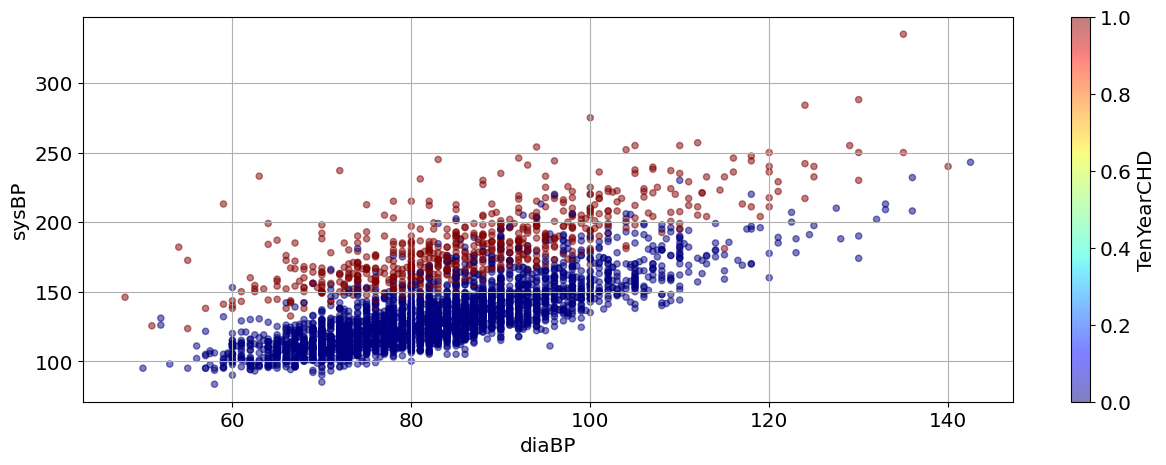

In [17]:

scatp = df[['sysBP','diaBP','TenYearCHD']].plot.scatter(
    x='diaBP',
    y='sysBP',
    c='TenYearCHD',
    cmap='jet',
    sharex=False,
    alpha=0.5,
 
 
)

<div dir=rtl>
    במודל דו-מימדי יהיו לנו שני משתנים בלתי תלויים וה"גובה" של הפונקציה (מאפס ועד אחת) יהיה משתנה בפני עצמו:
</div>

\begin{align}
\hat{y} = \frac{1}{1+e^{-z}}\\
z = a_0 + a_1x + a_2y\\
\end{align}

In [18]:
logistic_2d = sm.Logit(
    df['TenYearCHD'],
    sm.add_constant(df[['diaBP','sysBP']])
)

results_2d = logistic_2d.fit()
results_2d.summary()

Optimization terminated successfully.
         Current function value: 0.113214
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4235
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                  0.7343
Time:                        08:21:14   Log-Likelihood:                -479.80
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0277      0.636    -14.184      0.000     -10.275      -7.780
diaBP         -0.2372      0.012    -19.567      0.000      -0.261      -0.213
sysBP          0.1760      0.007     24.287      0.000       0.162       0.190
==============================================================================
"""

<div dir=rtl>
    גם כעת ברצוננו לראות את הישר המפריד בין הנתונים. לצורך כך כתבתי פונקציה. אין צורך להתעכב על כל שורה בה.
</div>

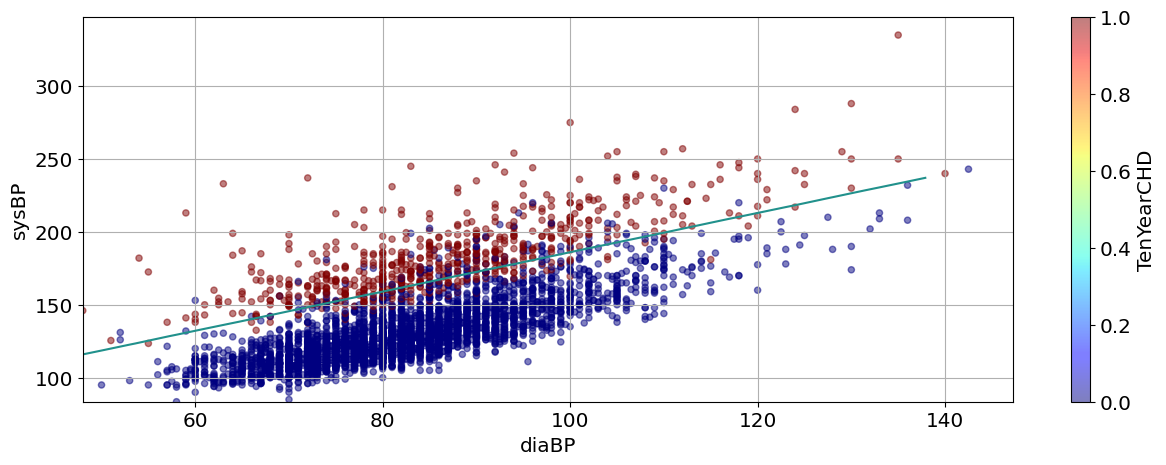

In [19]:
import numpy as np
def decision_boundary_plot(df, x, y, results, add_c=True, p=1, level=5):
    xx, yy = np.mgrid[
        df[x].min():df[x].max():level,
        df[y].min():df[y].max():level
    ]
    grid = np.vstack([xx.ravel(), yy.ravel()]).T
    grid = pd.DataFrame(grid, columns = [x,y])**p
    
    if add_c:
        hh = results.predict(sm.add_constant(grid)).values.reshape(xx.shape)
    else:
        hh = results.predict(grid).values.reshape(xx.shape)
            
    return plt.contour(xx,yy,hh, 1)


scatp = df[['sysBP','diaBP','TenYearCHD']].plot.scatter(
    x='diaBP',
    y='sysBP',
    c='TenYearCHD',
    cmap='jet',
    sharex=False,
    alpha=0.5
)

decp = decision_boundary_plot(df, 'diaBP', 'sysBP', results_2d)


שימו לב, הקו המפריד יכול להפוך למישור במקרה 3-מימדי (3 פיצ"רים) או למרחב 3-מימדי משוכן בתוך מרחב 4-מימדי וכך הלאה. 


הישר הניצב למישור מפריד זה הוא הישר אליו מבוצעת ההטלה, ולאורכו מתקיים המידול הסיגמואידלי

<div dir=rtl>
    ה. מה טיב הסיווג?
</div>

In [20]:
df['logistic 2d prediction'] = (
    results_2d.predict(sm.add_constant(df[['diaBP','sysBP']])) > 0.5
).astype(int)

CM = pd.DataFrame(
    df.groupby(['TenYearCHD','logistic 2d prediction']).size(),
    columns=['# of subjects']
)

CM.unstack()

# of subjects     
logistic 2d prediction             0    1
TenYearCHD                               
0                               3502   92
1                                101  543

In [21]:
accuracy = metrics.accuracy_score(
    df['TenYearCHD'],
    df['logistic 2d prediction']
)
print(f'2D accuracy: {accuracy*100:.1f}%')

2D accuracy: 95.4%


<div dir=rtl>
    ו. השתמשו במודל רגרסיה לגיסטית על מנת לסווג לפי שני הפיצ'רים - אינדקס מסת גוף ודופק.
</div>

<div dir=rtl>
    ראשית נשרטט את שני הפיצ'רים אחד כתלות בשני:
</div>

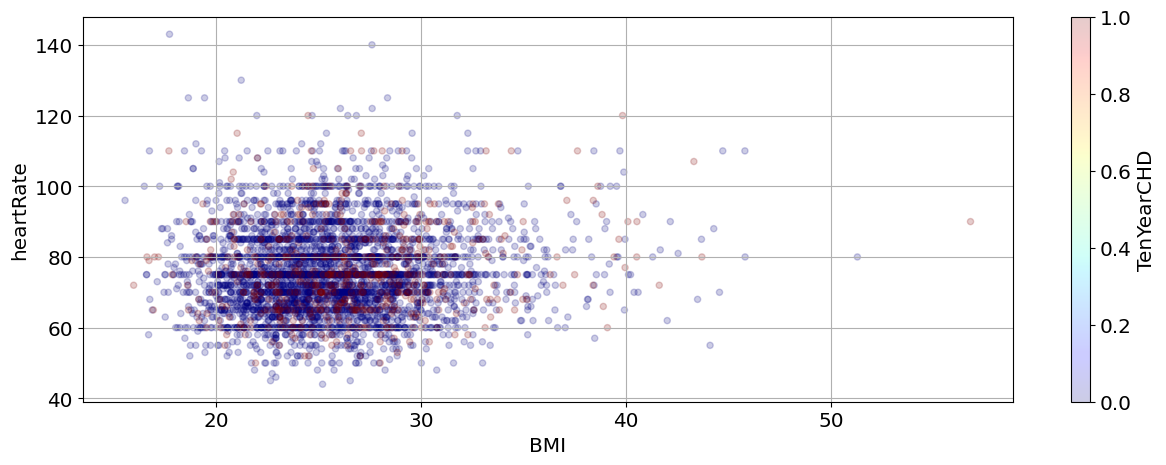

In [22]:
scatp = df[['BMI','heartRate','TenYearCHD']].plot.scatter(
    x='BMI',
    y='heartRate',
    c='TenYearCHD',
    cmap='jet',
    sharex=False,
    alpha=0.2
)

<div dir=rtl>
    נשים לב להתפלגות הנתונים. קיבלנו התפלגות מעין רדיאלית סביב מרכז כלשהו. <br />
    לא ניתן להבחין בהבדל במרחק של כל מחלקה מהמרכז, ולמרות זאת משום שביקשו ננסה לסווג לפי הרדיוס מהמרחק:
</div>

\begin{align}
\hat{y} = \frac{1}{1+e^{-z}}\\
z = a_1x^2 + a_2y^2\\
\end{align}

<div dir=rtl>
    על מנת שלא להוסיף פרמטרים ללמידה כמו מיקום מרכז האליפסה במרחב, ננרמל את הנקודות שלנו תחילה:
</div>

In [23]:
df_normalized = df[['BMI','heartRate']]
df_normalized.mean() 

BMI          25.802008
heartRate    75.878924
dtype: float64

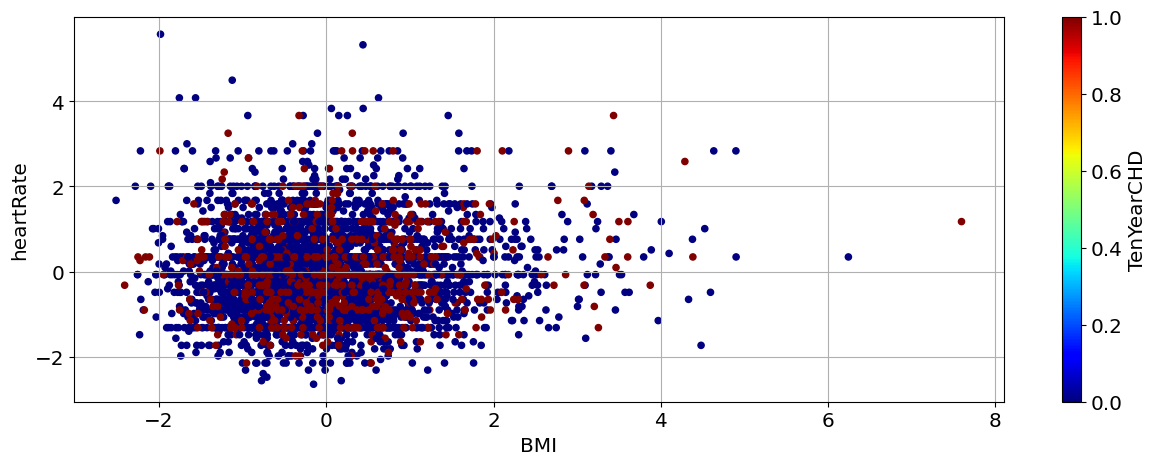

In [24]:
df_normalized = df_normalized - df_normalized.mean()
df_normalized = df_normalized / df_normalized.std()
# COULD ALSO TRY OTHER KINDS OF NORMALIZATION...
df_normalized['TenYearCHD'] = df['TenYearCHD']

scatp_norm = df_normalized[['BMI','heartRate','TenYearCHD']].plot.scatter(
    x='BMI',
    y='heartRate',
    c='TenYearCHD',
    cmap='jet',
    sharex=False
)

In [25]:
df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,4219.0,5.389279e-17,1.000000,-2.515129,-0.669591,-0.098529,0.548513,7.597340
heartRate,4237.0,0.000000e+00,1.000000,-2.650702,-0.655125,-0.073082,0.592111,5.581053
TenYearCHD,4238.0,1.519585e-01,0.359023,0.000000,0.000000,0.000000,0.000000,1.000000


<div dir=rtl>
    אכן קיבלנו ממוצע אפס (שואף אליו) וסטיית תקן אחת. <br />
    כעת נשים לב שמספר הערכים הקיימים בכל אחד מהפיצ'רים לא זהה - חשוד לקיומם של ערכים חסרים. מודלים רבים הממומשים מראש לא מיועדים להתמודד עם המצב הזה או שמיועדים לזרוק את הערכים האלה לכן זה מה שנעשה כעת.
</div>

In [26]:
df_normalized.dropna(inplace=True)

<div dir=rtl>
    לבסוף, נתאים מודל. נשים לב במשוואה שאין צורך להוסיף משתנה חופשי.
</div>

In [27]:
logistic_2d = sm.Logit(
    df_normalized['TenYearCHD'],
    df_normalized[['BMI','heartRate']]**2
    )

results = logistic_2d.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.574657
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4218
Model:                          Logit   Df Residuals:                     4216
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                 -0.3591
Time:                        08:21:16   Log-Likelihood:                -2423.9
converged:                       True   LL-Null:                       -1783.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BMI           -0.3404      0.032    -10.672      0.000      -0.403      -0.278
heartRate     -0.6475      0.038    -16.884      0.000      -0.723      -0.572
==============================================================================
"""

In [28]:
df_normalized['logistic 2d prediction'] = (
    results.predict(df_normalized[['BMI','heartRate']]**2) > 0.45
).astype(int)
# TODO: what happens at 0.5?

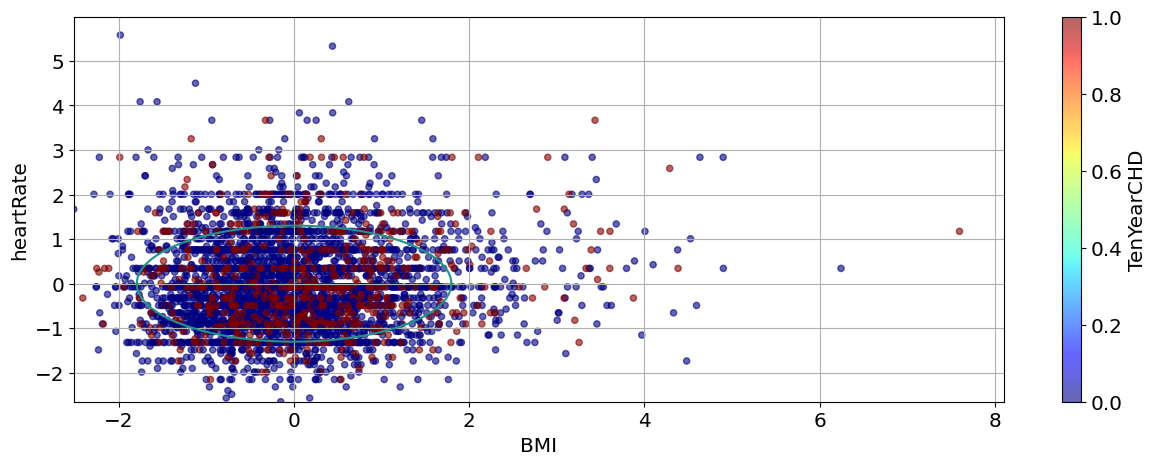

In [29]:
df_normalized[['BMI','heartRate','TenYearCHD']].plot.scatter(
    x='BMI',
    y='heartRate',
    c='TenYearCHD',
    cmap='jet',
    sharex=False,
    alpha=0.6
)

decp = decision_boundary_plot(df_normalized, 'BMI', 'heartRate', results, add_c=False, p=2, level=0.1)

In [30]:
CM = pd.DataFrame(
    df_normalized.groupby(['TenYearCHD','logistic 2d prediction']).size(),
    columns=['# of subjects']
)
display(CM)
CM.unstack()

# of subjects
TenYearCHD logistic 2d prediction               
0          0                                2744
           1                                 841
1          0                                 492
           1                                 141

# of subjects     
logistic 2d prediction             0    1
TenYearCHD                               
0                               2744  841
1                                492  141

In [31]:


metrics.accuracy_score(
    df_normalized['TenYearCHD'],
    df_normalized['logistic 2d prediction']
)

0.6839734471313419

<div dir=rtl>
לא ממש עבד לנו טוב וזה גם די עכבי עם הויזואליזצייה שלא הייתה מאוד מבטיחה.

ועדיין, נניח רגע שיש סיבות לחשוב שיש פוטנציאל לגישה. 

איך נדע שעשינו בדיקה ממצה ואפשר לעבור לדבר הבא בסדרת ה"ניסוי וטעיה" , ולא נפלנו על באג טכני?
</br>
בודקים את עצמנו על דאטא סינטטי!
</br>
לפני שמקודדים סינטזה ביד, שווה לבדוק האם יש משהו מתאים באוצרות של sklearn
</div>

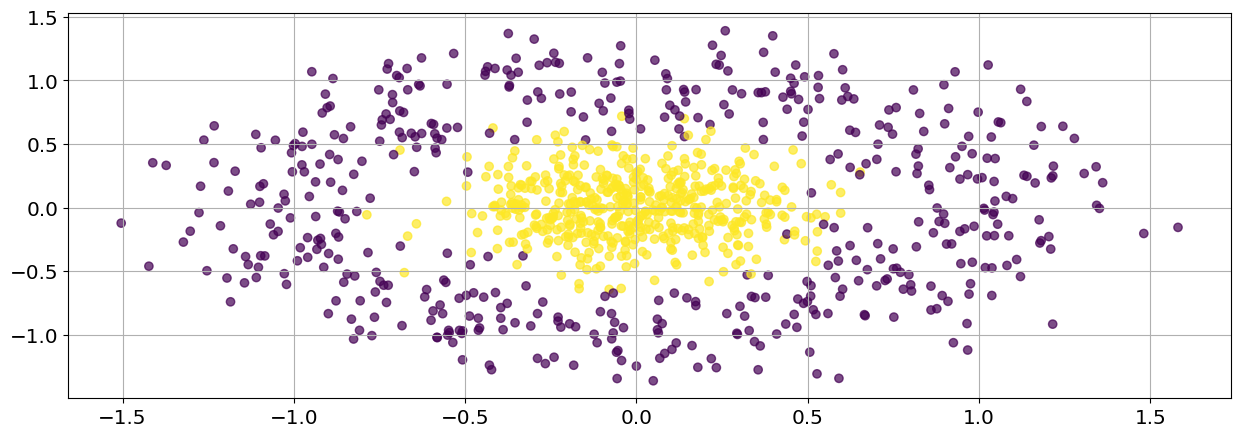

In [32]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

data, labels = make_circles(n_samples=1000, noise=0.2, factor=0.2)

plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.7)

plt.show()

In [33]:
import statsmodels.api as sm

logistic_2d_circle= sm.Logit(labels,data**2)

results = logistic_2d_circle.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.478089
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                  0.3103
Time:                        08:21:17   Log-Likelihood:                -478.09
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 1.533e-95
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2896      0.290     -7.898      0.000      -2.858      -1.721
x2            -2.4812      0.301     -8.250      0.000      -3.071      -1.892
==============================================================================
"""

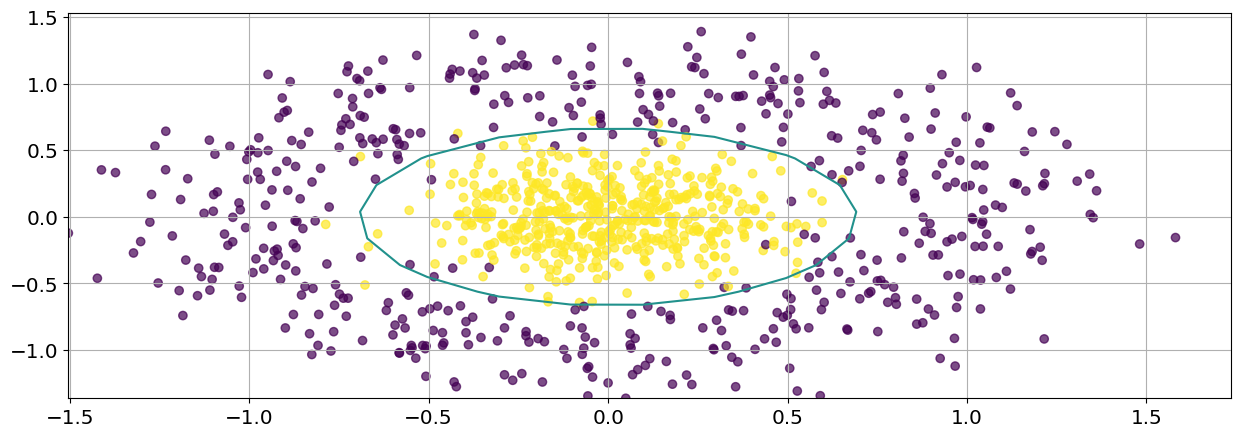

In [34]:
df_circ=pd.DataFrame(data, columns=['x', 'y'])

decision_boundary_plot(df_circ, 'x', 'y', results, add_c=False, p=2, level=0.2)

plt.scatter(data[:,0],data[:,1] ,c=labels, alpha=0.7)

In [35]:
from sklearn.metrics import confusion_matrix


pred = (results.predict(data**2) > 0.3).astype(int)
cm=pd.DataFrame(confusion_matrix(labels, pred))

cm

,0,1
0,491,9
1,25,475


In [36]:

metrics.accuracy_score(
    labels,
    pred
)

0.966

<div dir=rtl>
נושאים לדיון המשך:
</br>
</br>
א. השוו זאת למה שעשינו כדי לעשות פיט לא-ליניארי - 
</br>
בעזרת רגרסיה ליניארית במרחב אחר, של פיצ"רים מחושבים. ממדלים פונקציה לא-ליניארית של X , ע"יקומבינציה ליניארית של פונקציות בסיס של X
</div>

<div dir=rtl>
</br>
בקלסיפיקציה ע"י רגרסיה לוגיסטית על פיצ"רים מחושבים אנחנו מייצרים יריעות שוות-הסתברות צורניות. 
</br>
 ממדלים פונקציה לוגיסטית שמשתנה לאורך ציר ישר במרחב הפיצ"רים המחושבים,
 . בניצב לציר זה היפר-מישורים שווי הסתברות, שמיתרגמים ליריעות עקומות במרחב הפיצ"רים המקוריים 
 </br>
  זה כולל את משטח ההפרדה p=0.5
</br>
</div>


<div dir=rtl>

ב. למה לעצור באליפסה? 
</br>
לכאורה היינו יכולים להוסיף למודל איברים מסדר ראשון (X, Y),
 ולקבל דרגות חופש נוספות ועוד גמישות למשטח ההפרדה - ובאופן דומה ערכים מסדר גבוה
</div>
</br>
<div dir=rtl>
    באופן תאורטי היינו יכולים להתאים כל צורה אך יש סכנת אופברפיט.. 
    </br>
    כדי למנוע מגבילים את כמות הפיצ"רים, עוצרים מוקדם את האימון, או מוסיפים ל-LOSS אברי רגולריזצייה
</div>